## Introduction 

Status: Unfinished as a publishable tutorial

This is a simple application of Bayesian methods to model data. Bayesian statistics differs from classical statistics in that it takes into account prior knowledge of the data. This prior knowledge could be objective, say results from a similar study that was previously performed, or subjective, like intuition from experts in that field.


**Evaluating your goals and data**
1. What question(s) do we want to answer from our data?
2. What is the structure of our data and is it sufficent to answer our question? If we had to "redesign" the data, would it be different?


3. What kind of distribution does your data follow? Is there any restriction on what form the data can take, for example it will always be non-negative integers? Some common distributions are:
    Bernoulli distribution: your models two possible outcomes, like "yes/no" or "different/not different"
    Bionomial
    Uniform
    Normal
    Exponential
    Poisson
    Gamma

**Forming the prior**
It's important to estimate the distribution of your data accurately so that you can model a suitable prior distribution. The prior distribution adds information about what we think our parameter of interest should be. This can be based 




**Useful packages and resources:**
Posterior Predictive Checks: https://docs.pymc.io/notebooks/posterior_predictive.html


nice tutorial to follow: https://medium.com/@rrfd/simple-bayes-modelling-with-python-and-bonus-skellem-distribution-da7272d6ca24

In [4]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats


## Prior distribution

Below is a visualization of beta distributions. The code was taken from [Bayesian Methods for Hackers](https://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter6_Priorities/Ch6_Priors_PyMC2.ipynb)


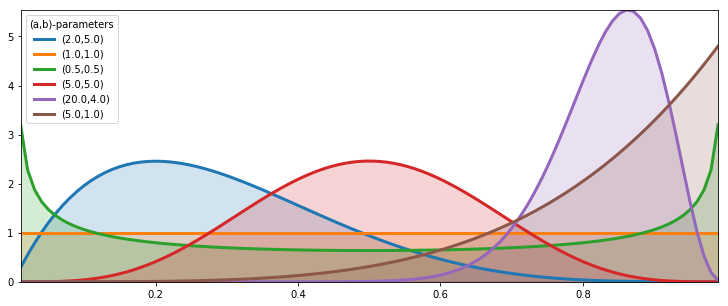

In [5]:
figsize(12.5, 5)

params = [(2, 5), (1, 1), (0.5, 0.5), (5, 5), (20, 4), (5, 1)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)" % (a, b), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc='upper left', title="(a,b)-parameters");

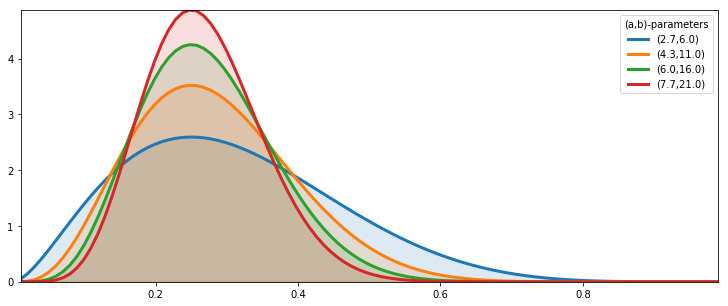

In [93]:
# Estimating alpha and beta paramters for p~Beta(alpha, beta)

# One interpretation (from Wikipedia page on Beta distribution), is that:
# alpha - 1 = no. sucesses
# beta - 1 = no. failures

# Using mean probability of 0.2494 from national data, we'll consider 100 hypothetical cases such that:
# No. successes = 0.2497
# No. failures = 1 - 0.2497

#alpha_ = 0.2497 + 1.
#beta_ = (1 - 0.2497) + 1.

mu = 0.2497
#beta_list = [0.1, 0.2, 0.4, 0.6, 0.8, 1]
beta_list = [5, 10, 15, 20]
params = []

for i in range(len(beta_list)):
    alpha_ = (mu * beta_list[i]) / (1 - mu)
    params.append((alpha_ + 1, beta_list[i]+1))
    
x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)" % (a, b), lw=3)
    plt.fill_between(x, 0, y, alpha=0.15, color=lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc='upper right', title="(a,b)-parameters");

In [94]:
# Mean p~Beta(4.3, 11.0)

alpha_ = 4.3-1
beta_ = 11.0-1

mean_prop = alpha_/(alpha_ + beta_)
print("Mean prior probability:", mean_prop)

Mean prior probability: 0.24812030075187969


From Consumer Reports data, showing the range of C-section rates in the US

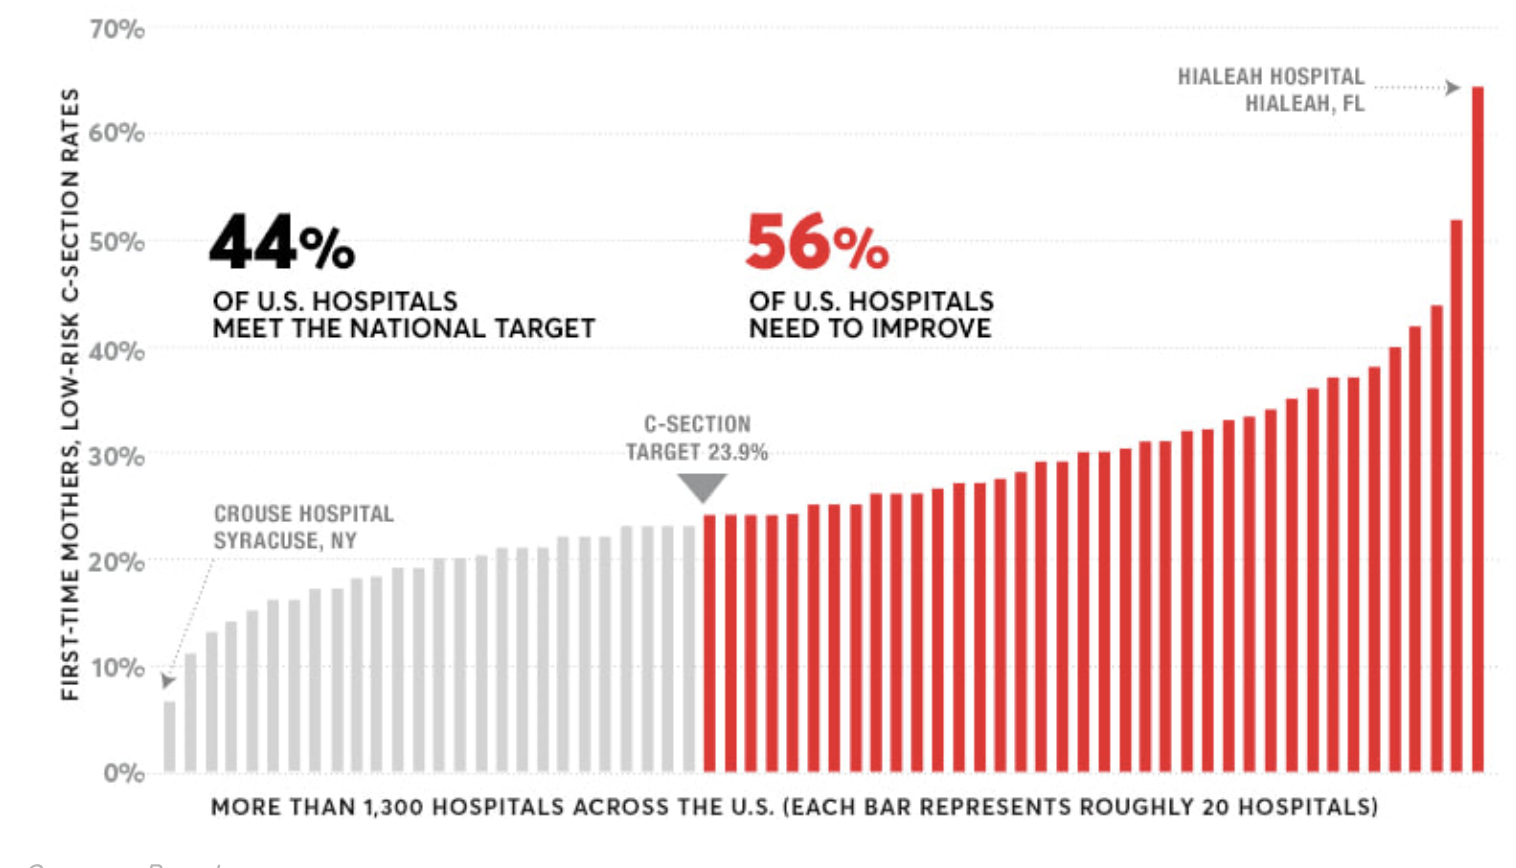

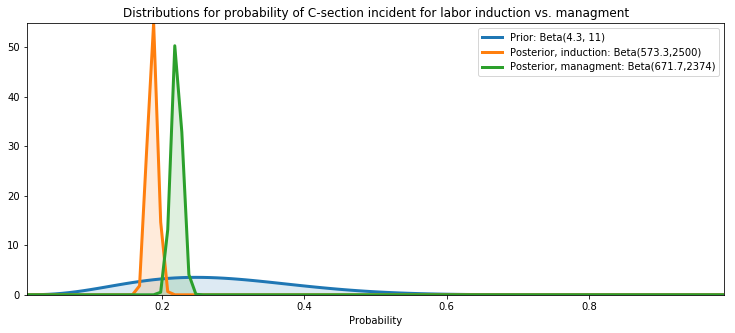

In [63]:
# Posterior distributions

params = [(4.3, 11), (573.3,2500), (671.7,2374)]
legend_label = ["Prior: Beta(4.3, 11)", "Posterior, induction: Beta(573.3,2500)", "Posterior, managment: Beta(671.7,2374)"]
i=0

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label=legend_label[i], lw=3)
    plt.fill_between(x, 0, y, alpha=0.15, color=lines[0].get_color())
    plt.autoscale(tight=True)
    i += 1
plt.ylim(0)
plt.legend(loc='upper right')
plt.xlabel("Probability")
plt.title('Distributions for probability of C-section incident for labor induction vs. managment');



In [61]:
# C-section: finding the means

mean_ind = 573.3/ (573.3+2500)
print("Mean probability of C-section with induction:", mean_ind)
mean_mngt = 671.7/ (671.7+2374)
print("Mean probability of C-section with managment:", mean_mngt)

Mean probability of C-section with induction: 0.18654215338561153
Mean probability of C-section with managment: 0.22054043405456877


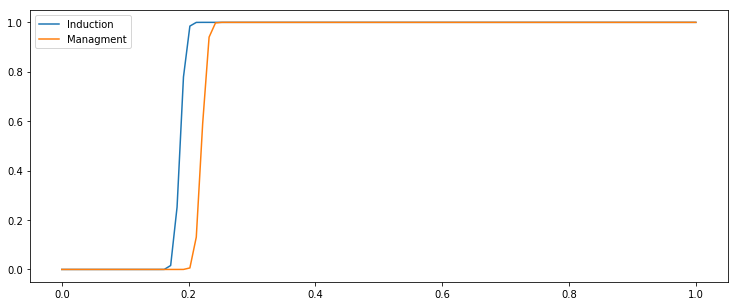

In [77]:
# C-section: finding the 95% credible sets
# To find the 95% credible sets, we can use the scipy function scipy.special.btdtri to find the 
# p-th quantile of a beta distribution. For our case, we want p-th quantile of 0.05.

# First let's view the CDF of the posterior distributions:
import scipy

x = np.linspace(0,1,100)
cdf_ind = scipy.stats.beta.cdf
plt.plot(x,cdf_ind(x, 573.3,2500), label="Induction")
plt.plot(x,cdf_ind(x, 671.7,2374), label="Managment")
plt.legend(loc='upper left')
plt.show()


In [79]:
ind_95cred = beta.ppf([0.025, 0.5, 0.975], 573.3,2500)
mngt_95cred = beta.ppf([0.025, 0.5, 0.975], 671.7,2374)

print("The median and 95% equi-tailed credible set")
print("Induction:", ind_95cred[1], "[",ind_95cred[0], ",", ind_95cred[2], "]")
print("Managment:", mngt_95cred[1],  "[",mngt_95cred[0], ",", mngt_95cred[2], "]")

The median and 95% equi-tailed credible set
Induction: 0.18647415200534004 [ 0.17296740717917342 , 0.2005032987744947 ]
Managment: 0.22047925788934594 [ 0.20599378174885252 , 0.23543470386469068 ]


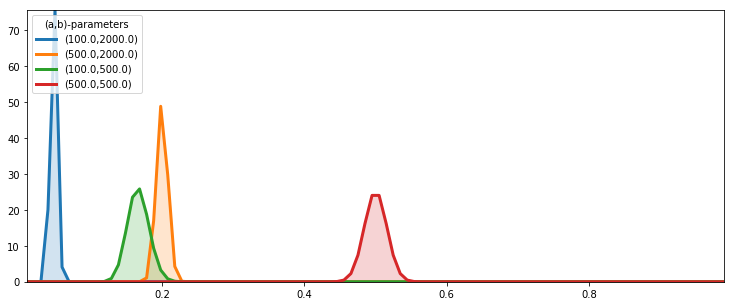

In [88]:
figsize(12.5, 5)

params = [(100,2000), (500,2000), (100,500), (500,500)]

x = np.linspace(0.01, .99, 100)
beta = stats.beta
for a, b in params:
    y = beta.pdf(x, a, b)
    lines = plt.plot(x, y, label="(%.1f,%.1f)" % (a, b), lw=3)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_color())
    plt.autoscale(tight=True)
plt.ylim(0)
plt.legend(loc='upper left', title="(a,b)-parameters");